In [ ]:
'''
pls add this in .vscode/settings.json
{
    ...
    "files.associations":{
        "*.pySec":"python"
    },
    ...
}
'''

In [17]:
exec(open("1.loadData.pySec").read())

step 1 is complete


In [22]:
print('total training cat images:', len(os.listdir(trainCatDir)))
print('total training dog images:', len(os.listdir(trainDogDir)))
print('total validation cat images:', len(os.listdir(validationCatDir)))
print('total validation dog images:', len(os.listdir(validationDogDir)))
print('total test cat images:', len(os.listdir(testCatDir)))
print('total test dog images:', len(os.listdir(testDogDir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [23]:
exec(open("2.convnet.pySec").read())

step 2 is complete


In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [25]:
exec(open("3.dataPreprocess.pySec").read())

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
step 3 is complete


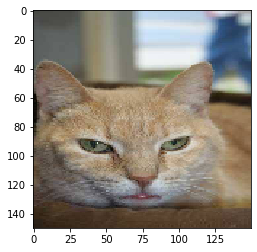

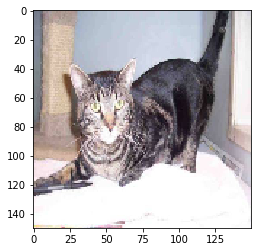

In [26]:
import matplotlib.pyplot as plt 
def showAnimalInTrainGenerator(picNum): 
    firstDim = picNum % 20 
    secondDim = int((picNum-firstDim)/20) 
    poltImage = trainGenerator[secondDim][0][firstDim]#[100][2 0:data(pic) 1:label][20]
    plt.imshow(poltImage, cmap=plt.cm.get_cmap('binary')) 
    plt.show()
    return
def showAnimalInValidationGenerator(picNum): 
    firstDim = picNum % 20     
    secondDim = int((picNum-firstDim)/20) 
    poltImage = validationGenerator[secondDim][0][firstDim]#[50][2 0:data(pic) 1:label][20]
    plt.imshow(poltImage, cmap=plt.cm.get_cmap('binary')) 
    plt.show()
    return
showAnimalInTrainGenerator(1999)
showAnimalInValidationGenerator(999)

In [27]:
#if you want to retrain it, you need to redo the step2
exec(open("4.fitModelSave.pySec").read())

Epoch 1/30
100/100 [==============================] - 6s 58ms/step - loss: 0.6848 - acc: 0.5375 - val_loss: 0.6316 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 5s 51ms/step - loss: 0.6469 - acc: 0.6195 - val_loss: 0.6229 - val_acc: 0.6680
Epoch 3/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5934 - acc: 0.6775 - val_loss: 0.6961 - val_acc: 0.6390
Epoch 4/30
100/100 [==============================] - 5s 55ms/step - loss: 0.5631 - acc: 0.7010 - val_loss: 0.4783 - val_acc: 0.6120
Epoch 5/30
100/100 [==============================] - 5s 55ms/step - loss: 0.5417 - acc: 0.7195 - val_loss: 0.7028 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5128 - acc: 0.7410 - val_loss: 0.6973 - val_acc: 0.6910
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.4884 - acc: 0.7595 - val_loss: 0.7488 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 5s 50ms/step - 

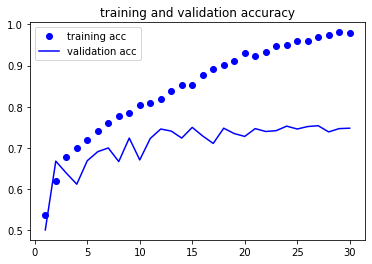

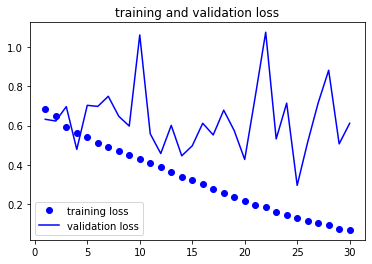

step 5 is complete


In [28]:
exec(open("5.showLossSummary.pySec").read())

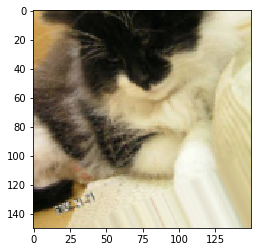

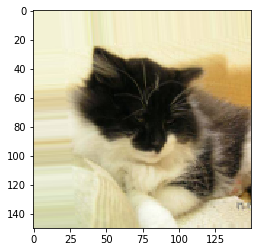

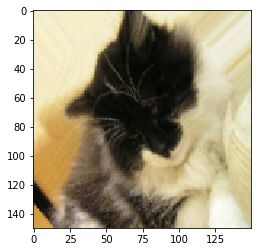

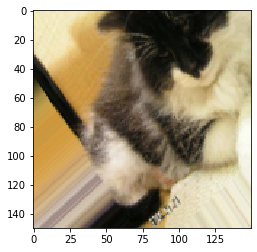

example 6 is complete


In [29]:
exec(open("6.ex.dataAugmentation.pySec").read())

In [30]:
exec(open("7.dropoutModel.pySec").read())

step 7 is complete


In [31]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [32]:
trainDataGen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True,)

testDataGen = ImageDataGenerator(rescale=1./255)

trainGenerator = trainDataGen.flow_from_directory(trainDir, target_size=(150,150), batch_size=32, class_mode='binary')

validationGenerator = testDataGen.flow_from_directory(validationDir, target_size=(150,150), batch_size=32, class_mode='binary')

history = model.fit_generator(trainGenerator, steps_per_epoch=100, epochs = 100, validation_data=validationGenerator, validation_steps=50)

model.save("catDogClassfiyDataset2.h5")

print("step 8 is complete")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 18s 178ms/step - loss: 0.6912 - acc: 0.5177 - val_loss: 0.5774 - val_acc: 0.5082
Epoch 2/100
100/100 [==============================] - 16s 158ms/step - loss: 0.6762 - acc: 0.5685 - val_loss: 0.6757 - val_acc: 0.5896
Epoch 3/100
100/100 [==============================] - 16s 160ms/step - loss: 0.6658 - acc: 0.5854 - val_loss: 0.6179 - val_acc: 0.6218
Epoch 4/100
100/100 [==============================] - 16s 162ms/step - loss: 0.6558 - acc: 0.6016 - val_loss: 0.6069 - val_acc: 0.6089
Epoch 5/100
100/100 [==============================] - 16s 164ms/step - loss: 0.6362 - acc: 0.6310 - val_loss: 0.6619 - val_acc: 0.6421
Epoch 6/100
100/100 [==============================] - 17s 171ms/step - loss: 0.6285 - acc: 0.6424 - val_loss: 0.7315 - val_acc: 0.6798
Epoch 7/100
100/100 [==============================] - 16s 159ms/step - loss: 0.6091 - acc: 0.6592 -

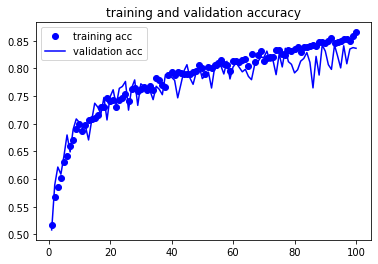

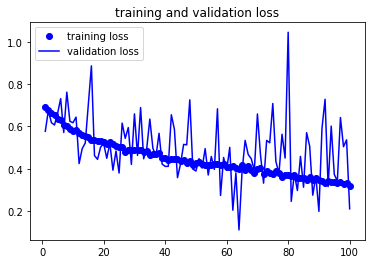

step 5 is complete


In [33]:
exec(open("5.showLossSummary.pySec").read())